<a href="https://colab.research.google.com/github/stepanve/colaboratory-study/blob/master/study5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn
%matplotlib inline

import sklearn

%precision 3

import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
mushroom.columns = ['classes', 'cap_shape', 'cap_surface', 'cap_color', 'odor', 'bruises',
                      'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape',
                      'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
                      'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color',
                      'right_number', 'ring_type', 'spore_print_color', 'population', 'habitat']
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,right_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [25]:
print('データの形式:{}'.format(mushroom.shape))
print('欠損の数:{}'.format(mushroom.isnull().sum().sum()))

データの形式:(8124, 23)
欠損の数:0


In [0]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x=='p' else 0)

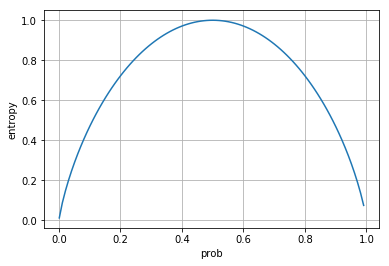

In [27]:
def calc_entropy(p):
  return - (p * np.log2(p) + (1-p) * np.log2(1-p))

p = np.arange(0.001, 0.999, 0.01)
plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.879
正解率(test):0.891


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


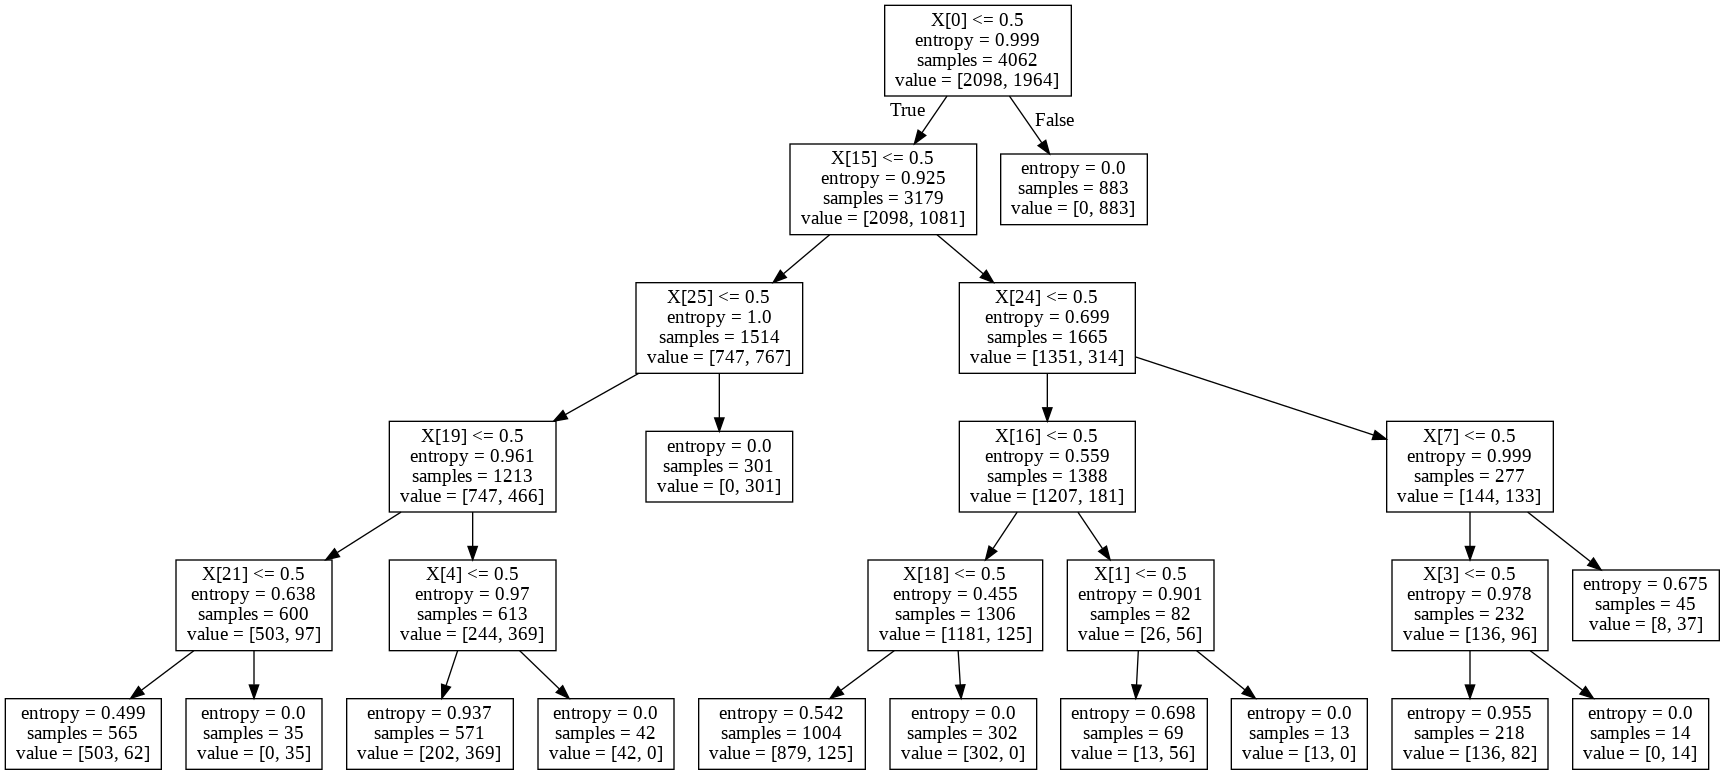

In [38]:
from sklearn import tree
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())